# **Lab 6**

In [210]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import statistics
import math
from scipy import stats
import h5py
import pandas as pd

plt.rcParams["figure.figsize"] = (10,10)

### **Problem 1**

Here, we are supposed to create a Poisson distribution with mean 100. Afterwards, we will determine the $5\sigma$ sensitivity threshold. 

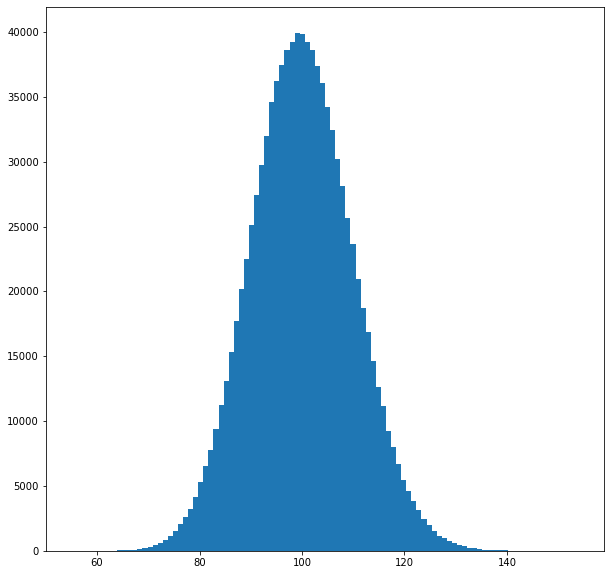

In [211]:
bkgd = scipy.stats.poisson.rvs(mu=100, loc=0, size=1000000)
plt.hist(bkgd, bins=100);
plt.show()

In [212]:
five_sigma = stats.poisson.ppf(stats.norm.cdf(5),100)
print("Five-Sigma Threshold:", five_sigma)

Five-Sigma Threshold: 154.0


### **Problem 2**

Now, we will inject a moderately strong signal of known strength. We will choose a signal within the range $8-30\sigma$. Specifically, we chose to use a signal of $8\sigma$. Afterwards, we will inject this signal into our background data many times. 

In [213]:
eight_sigma = stats.poisson.ppf(stats.norm.cdf(8),100)
print("Eight-Sigma Threshold:", eight_sigma)

Eight-Sigma Threshold: 190.0


**Section 2a**

From above, we found the $8\sigma$ sensitivity threshold is 190. When we injected this signal into our background data, we found we get a Poisson distribution with mean 290. This means the mean shifted from 100 to 290 so the distribution shifts by the injected signal. Here, the observed signal appears to be the brightest since that is the location of the new mean.

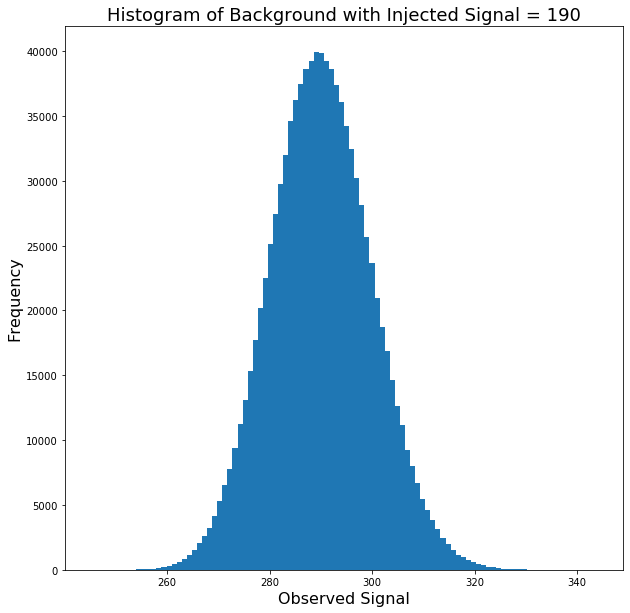

In [214]:
injected_bkgd = bkgd+190
plt.hist(injected_bkgd, bins=100)
plt.title('Histogram of Background with Injected Signal = 190', fontsize=18)
plt.xlabel('Observed Signal', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

**Section 2b**

Here, we want to discuss if our observed signal is biased and/or symmetric. From the plot above, we know this is simply our background distribution shifted by 190. Thus, the observed signal is symmetric since our background is symmetric. Also, the observed signal is biased because the observed signal is stronger than the true injected signal. The true injected signal is 190 but our observed signal is 290, thus the observed signal is stronger. 

### **Problem 3**

Now, we want a suite of injected signals with strengths ranging from $0-30\sigma$. This process will follow closely to that of HW5. Below is our new injected background using a random injected signal.  

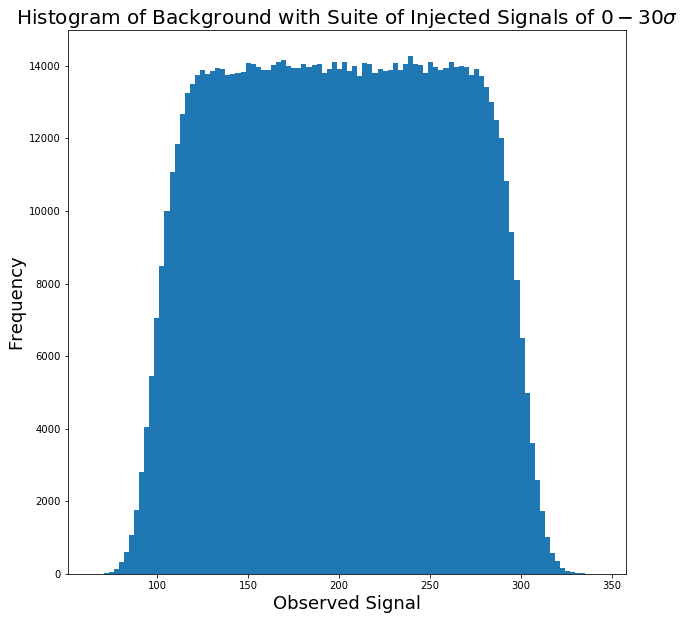

In [215]:
rand_signal = np.random.uniform(low=0.0, high=200, size=(1000000));
injected_bkgd2 = bkgd+rand_signal

plt.hist(injected_bkgd2, bins=100)
plt.title('Histogram of Background with Suite of Injected Signals of $0-30\sigma$', fontsize=20)
plt.xlabel('Observed Signal', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

**Section 3a**

Here, we want to create a 2D histogram of injected signal vs observed data. Specifically, we are plotting the background distribution against the suite of signals. If we take slices of the 2D histogram, we can learn the observed data given an injected signal value or the injected signal given an observed data value. 

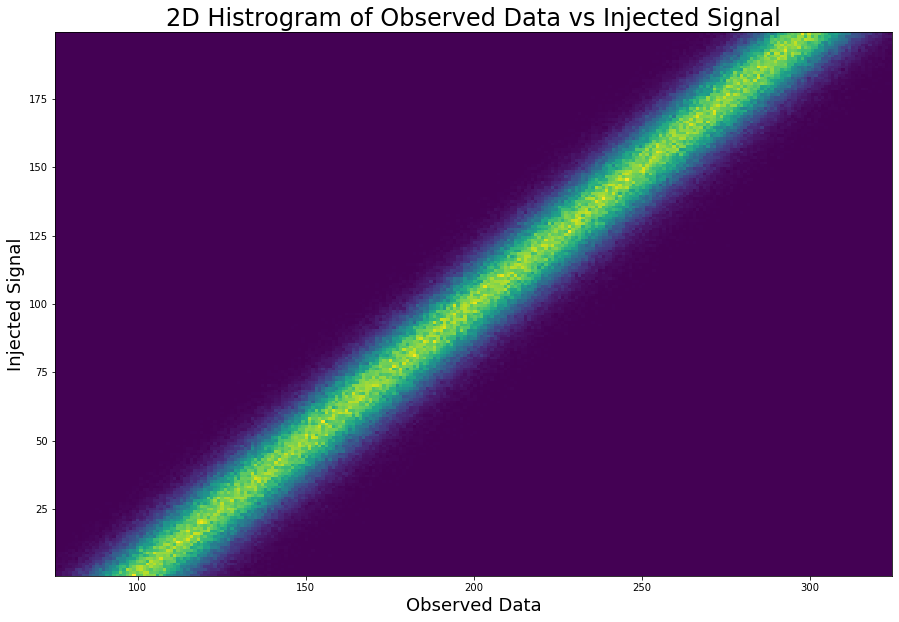

In [216]:
data_edges = np.linspace(75,325,250)
signal_edges = np.linspace(0,200,200)

fig, ax = plt.subplots(1, 1)
fig.set_figheight(10)
fig.set_figwidth(15)
Psd, temp, temp2 = np.histogram2d(injected_bkgd2, rand_signal, bins=[data_edges, signal_edges], density=True);
data_centers = (data_edges[:-1]+data_edges[1:])/2
signal_centers = (signal_edges[:-1]+signal_edges[1:])/2
plt.pcolormesh(data_centers, signal_centers, Psd.T)
plt.title('2D Histrogram of Observed Data vs Injected Signal', fontsize=24)
plt.xlabel('Observed Data', fontsize=18);
plt.ylabel('Injected Signal', fontsize=18);

**Section 3b**

Here, we want to compare a slice of the 2D histogram when True Signal = 190 to the plot of the background with the injected signal of 190. We expect them to be similar. Below, we see this is indeed the case. Thus, we get the same answer.

In [217]:
data = pd.DataFrame(Psd)

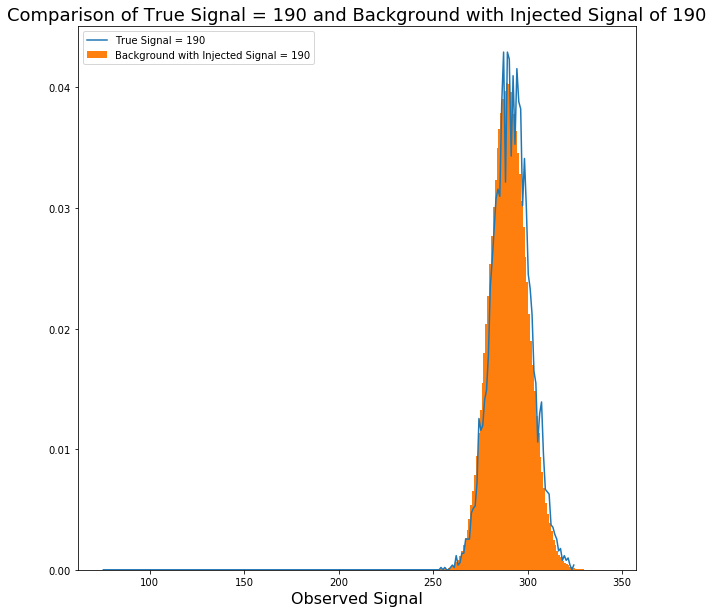

In [218]:
plt.plot(data_centers,data.iloc[:,190]/np.trapz(data.iloc[:,190]), label='True Signal = 190')
plt.hist(injected_bkgd, bins=100, density=True, label='Background with Injected Signal = 190')
plt.title('Comparison of True Signal = 190 and Background with Injected Signal of 190', fontsize=18)
plt.xlabel('Observed Signal', fontsize=16)
plt.legend()
plt.show()

**Section 3c**

Now, we want to select an observed data value which is stronger than $5\sigma$. Afterwards, we want to create a 1D histogram of the true signal probability given the observed data. Specifically, the 1D histogram derives from a vertical slice of the 2D histogram when Observed Signal = 200. So, we see the true signal is approximately 100 for an observed signal of 200. 

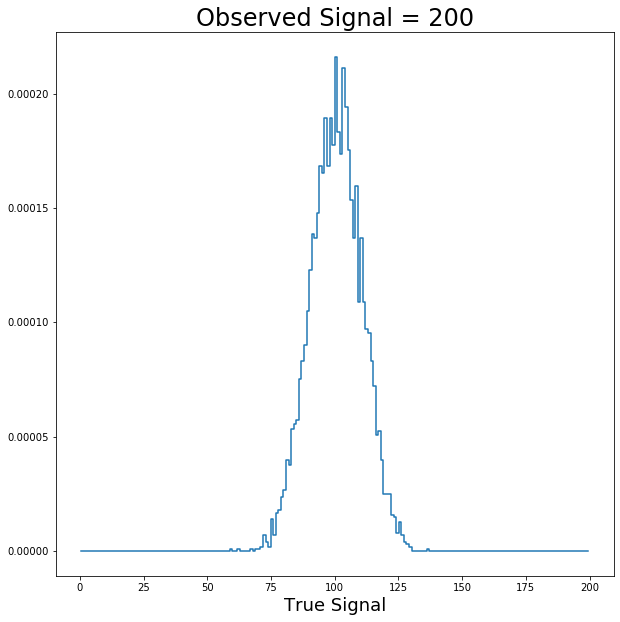

In [219]:
plt.step(signal_centers,data.iloc[125,:])
plt.title('Observed Signal = 200', fontsize=24)
plt.xlabel('True Signal', fontsize=18)
plt.show()

**Section 3d**

Here, we want to calculate the $1\sigma$ uncertainty on the true signal strength for the observed signal we chose. As a reminder, we picked Observed Signal = 200 for the previous problem. From below, we get a mean of 107 where $1\sigma$ is 91 and 111 to the left and right respectively. So, this is our $1\sigma$ uncertainty.

In [220]:
obs_signal = data.iloc[125,:]/np.trapz(data.iloc[125,:])

p = stats.norm.cdf(0.5)
for i in range(obs_signal.size):
    if np.trapz(obs_signal[:i]) >= p:
        print("Mean: ", i)
        break

p = stats.norm.cdf(1)
for i in range(obs_signal.size):
    if np.trapz(obs_signal[:i]) >= p:
        print("1-Sigma (right):", i)
        break
        
p = stats.norm.cdf(-1)
for i in range(obs_signal.size):
    if np.trapz(obs_signal[:i]) >= p:
        print("1-Sigma (left):", i)
        break

Mean:  107
1-Sigma (right): 112
1-Sigma (left): 91


**Section 3e**

Here, we want to discuss the answer of the previous problem in depth. Specifically, we will answer if it is symmetric, biased, and logical. From above, Observed Signal = 200 has a mean of 107 where $1\sigma$ is 91 and 111 to the left and right respectively. This means the distribution is not symmetric. This could be because of the randomness in the suite of random signals. We believe it is biased because the observed signal is greater than the true signal by approximately the mean of the background. For example, the true signal is 107 when the observed signal is 200 which is a difference of 93. As a reminder, the mean of the background is 100 which is approximately equal to 93. Thus, this makes sense. 